In [335]:
import sys
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

delay_speed = 3 # seconds

In [277]:
def parse_good_reads_book_page(response):
    page_text = response.text

In [278]:
# Data cells
batting_url = 'https://www.baseball-reference.com/teams/{0}/batteam.shtml'
pitching_url = 'https://www.baseball-reference.com/teams/{0}/pitchteam.shtml'



team_codes = ['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR',
             'ANA', 'LAD', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SD', 'SF', 'STL', 'SEA', 'TBD',
             'TEX', 'TOR', 'WSN']




In [279]:
def get_text_from_BR_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text

def br_wait():
    time.sleep(delay_speed)
    
def get_deepest_node(soup_element):
    descendents = soup_element.descendents
    if descendents:
        return descendents[-1]
    else:
        return soup_element

In [280]:
id_pitching_table = 'yby_team_pitch'

def get_pitching_url(team_code):
    return pitching_url.format(team_code)

def get_team_pitching_table(soup):
    return soup.find('table', id=id_pitching_table)

def get_team_pitching_page_soup(team_code):
    url = get_pitching_url(team_code)
    page_text = get_text_from_BR_url(url)
    if not page_text:
        return None
    
    soup = BeautifulSoup(page_text, "lxml")
    return soup

def scrape_pitching_table_header(team_code):
    soup = get_team_pitching_page_soup(team_code)
    pitching_table = get_team_pitching_table(soup)
    if pitching_table:
        children = pitching_table.find('thead').find('tr').findChildren()
        return [child.text for child in children]
    else:
        return None

def scrape_team_pitching_table(team_code):
    soup = get_team_pitching_page_soup(team_code)
    pitching_table = get_team_pitching_table(soup)
    pitching_stats = []
    if pitching_table:
        pitching_Years = pitching_table.find('tbody')
        for year in pitching_Years.findChildren(recursive=False):
            stats_for_year = [get_deepest_node(stat).text for stat in year.findChildren(recursive=False)]
            stats_for_year.insert(0,team_code)
            pitching_stats.append(stats_for_year)
        return pitching_stats
    return None

In [281]:
# Team batting methods
id_batting_table = 'yby_team_bat'

def get_batting_url(team_code):
    return batting_url.format(team_code)

def get_team_batting_table(soup):
    return soup.find('table', id=id_batting_table)

def get_team_batting_page_soup(team_code):
    url = get_batting_url(team_code)
    page_text = get_text_from_BR_url(url)
    if not page_text:
        return None
    
    soup = BeautifulSoup(page_text, "lxml")
    return soup

def scrape_batting_table_header(team_code):
    soup = get_team_batting_page_soup(team_code)
    batting_table = get_team_batting_table(soup)
    if batting_table:
        children = batting_table.find('thead').find('tr').findChildren()
        return [child.text for child in children]
    else:
        return None

def scrape_team_batting_table(team_code):
    soup = get_team_batting_page_soup(team_code)
    batting_table = get_team_batting_table(soup)
    batting_stats = []
    if batting_table:
        batting_years = batting_table.find('tbody')
        for year in batting_years.findChildren(recursive=False):
            stats_for_year = [get_deepest_node(stat).text for stat in year.findChildren(recursive=False)]
            stats_for_year.insert(0,team_code)
            batting_stats.append(stats_for_year)
        return batting_stats
    return None
    

In [282]:

#start with batting data
columns = scrape_batting_table_header(team_codes[0])
if columns:
    columns.insert(0,'Team')
    
    br_wait()
    all_team_data = []
    for team in team_codes:
        print(team)
        batting_data = scrape_team_batting_table(team)
        all_team_data = all_team_data + batting_data
        br_wait()
        
    offense_df = pd.DataFrame(all_team_data, columns=columns)


ARI
ATL
BAL
BOS
CHC
CHW
CIN
CLE
COL
DET
FLA
HOU
KCR
ANA
LAD
MIL
MIN
NYM
NYY
OAK
PHI
PIT
SD
SF
STL
SEA
TBD
TEX
TOR
WSN


In [283]:
#now pitching data
columns = scrape_pitching_table_header(team_codes[0])
if columns:
    columns.insert(0,'Team')
    print(columns)
    br_wait()
    all_team_data = []
    for team in team_codes:
        print(team)
        pitching_data = scrape_team_pitching_table(team)
        all_team_data = all_team_data + pitching_data
        br_wait()
        
    pitching_df = pd.DataFrame(all_team_data, columns=columns)

['Team', 'Year', 'Lg', 'W', 'L', 'Finish', 'RA/G', 'ERA', 'G', 'CG', 'tSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'SO9', 'HR9', 'E', 'DP', 'Fld%', 'PAge']
ARI
ATL
BAL
BOS
CHC
CHW
CIN
CLE
COL
DET
FLA
HOU
KCR
ANA
LAD
MIL
MIN
NYM
NYY
OAK
PHI
PIT
SD
SF
STL
SEA
TBD
TEX
TOR
WSN


In [296]:
pitching_df.sample(20)

LG    W    L FINISH  RA/G   ERA    G   CG TSHO  SV  ...    HR  \
TEAM YEAR                                                           ...         
LAD  1895       NL   71   60      5  6.25  4.93  134  104    5   6  ...    42   
MIN  1924       AL   92   62      1  3.93  3.34  156   74   13  25  ...    34   
BOS  1922       AL   61   93      8  4.99  4.30  154   71   10   5  ...    48   
NYY  2012  AL East   95   67      1  4.12  3.84  162    6    9  51  ...   190   
LAD  1887       AA   60   74      6  6.65  4.47  138  132    3   3  ...    27   
CHW  1951       AL   81   73      4  4.15  3.50  155   74   11  14  ...   109   
CIN  1889       AA   76   63      4  5.45  3.50  141  114    3   8  ...    35   
BAL  1976  AL East   88   74      2  3.69  3.32  162   59   16  23  ...    80   
CLE  1949       AL   89   65      3  3.73  3.36  154   65   10  19  ...    82   
STL  1991  NL East   84   78      2  4.00  3.69  162    9    5  51  ...   114   
MIN  1964       AL   79   83      6  4.16  3.58  163   47    4  28  ...   181   
COL  2008  NL West   74   88      3  5.07  4.77  162    3    8  36  ...   148   
WSN  1984  NL East   78   83      5  3.63  3.31  161   19   10  48  ...   114   
BOS  1956       AL   84   70      4  4.85  4.17  155   50    8  20  ...   130   
PIT  1939       NL   68   85      6  4.71  4.15  153   53   10  15  ...    70   
PHI  1937       NL   61   92      7  5.61  5.05  155   59    6  15  ...   115   
     2002  NL East   80   81      3  4.50  4.17  161    5    9  47  ...   153   
CLE  1983  AL East   70   92      7  4.85  4.43  162   34    8  25  ...   120   
CHC  1909       NL  104   49      2  2.52  1.75  155  111   32  11  ...     6   
BOS  1930       AL   52  102      8  5.29  4.68  154   79    4   5  ...    75   

            BB    SO   WHIP   SO9   HR9    E   DP  FLD%  PAGE  
TEAM YEAR                                                      
LAD  1895  397   218  1.520  1.69  0.33  326   97  .941  25.6  
MIN  1924  505   469  1.326  3.05  0.22  171  149  .972  30.3  
BOS  1922  503   359  1.464  2.35  0.31  224  145  .965  28.5  
NYY  2012  431  1318  1.268  8.21  1.18   75  135  .987  30.3  
LAD  1887  454   332  1.520  2.52  0.21  562   88  .905  26.2  
CHW  1951  549   572  1.341  3.63  0.69  151  176  .976  28.9  
CIN  1889  475   562  1.404  4.07  0.25  440  121  .926  25.7  
BAL  1976  489   678  1.283  4.15  0.49  118  157  .982  28.8  
CLE  1949  611   594  1.363  3.86  0.53  103  192  .983  30.2  
STL  1991  454   822  1.269  5.15  0.71  107  133  .983  29.4  
MIN  1964  545  1099  1.290  6.69  1.10  145  131  .977  27.3  
COL  2008  562  1041  1.459  6.48  0.92   96  176  .985  28.5  
WSN  1984  474   861  1.263  5.42  0.72  132  147  .978  27.8  
BOS  1956  668   712  1.446  4.58  0.84  169  168  .972  27.5  
PIT  1939  423   464  1.448  3.08  0.47  168  153  .972  28.9  
PHI  1937  501   529  1.551  3.47  0.75  184  157  .970  28.0  
     2002  570  1075  1.346  6.67  0.95   88  156  .986  28.5  
CLE  1983  529   794  1.429  4.96  0.75  122  174  .980  27.7  
CHC  1909  364   680  1.042  4.37  0.04  244   95  .962  28.1  
BOS  1930  488   356  1.472  2.36  0.50  196  161  .968  27.9  

[20 rows x 24 columns]

In [297]:
def make_all_columns_caps(df):
    df = df.columns.map(str.upper)


offense_df.columns = offense_df.columns.map(str.upper)
pitching_df.columns = pitching_df.columns.map(str.upper)

In [302]:
def set_team_year_index(df):
    df.set_index(['TEAM','YEAR'], inplace=True)

#set_team_year_index(offense_df)
#set_team_year_index(pitching_df)

In [303]:
def convert_number_columns(df):
    df.apply(pd.to_numeric, errors='ignore')

offense_df = offense_df.apply(pd.to_numeric, errors='ignore')
pitching_df = pitching_df.apply(pd.to_numeric, errors='ignore')

In [320]:
#['TEAM', 'YEAR', 'LG', 'W', 'L', 'FINISH', 'R/G', 'G', 'PA', 'AB', 'R',
#       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
#       'SLG', 'OPS', 'E', 'DP', 'FLD%', 'BATAGE']
identity_columns = ['TEAM','YEAR']
old_school_offense = ['W','R/G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO']

old_offense = offense_df[old_school_offense]

In [305]:
#sns.pairplot(df[old_school_offense], size = 1.2, aspect=1.5)


In [306]:
#sns.pairplot(df[old_school_offense], size = 1.2, aspect=1.5)
old_offense[old_school_offense].corr()

W       R/G        PA        AB         R         H        2B  \
W    1.000000  0.329360  0.485297  0.436743  0.569402  0.513291  0.374482   
R/G  0.329360  1.000000 -0.063230 -0.098551  0.835404  0.378273  0.343326   
PA   0.485297 -0.063230  1.000000  0.982046  0.478530  0.801962  0.615336   
AB   0.436743 -0.098551  0.982046  1.000000  0.438303  0.802045  0.611146   
R    0.569402  0.835404  0.478530  0.438303  1.000000  0.762780  0.629844   
H    0.513291  0.378273  0.801962  0.802045  0.762780  1.000000  0.740882   
2B   0.374482  0.343326  0.615336  0.611146  0.629844  0.740882  1.000000   
3B   0.005476  0.260219 -0.218083 -0.222850  0.129339  0.050709 -0.261363   
HR   0.368967  0.211648  0.545143  0.538237  0.482790  0.449078  0.604987   
RBI  0.575963  0.689738  0.623915  0.582203  0.944398  0.833435  0.751443   
SB   0.064262  0.207643 -0.259339 -0.261676  0.095065 -0.158993 -0.260643   
CS  -0.015585 -0.121719 -0.054927 -0.073118 -0.111016  0.004523 -0.200103   
BB   0.463159  0.201833  0.696978  0.573125  0.537428  0.508197  0.461919   
SO   0.194562 -0.194865  0.526684  0.540108  0.110428  0.209580  0.472529   

           3B        HR       RBI        SB        CS        BB        SO  
W    0.005476  0.368967  0.575963  0.064262 -0.015585  0.463159  0.194562  
R/G  0.260219  0.211648  0.689738  0.207643 -0.121719  0.201833 -0.194865  
PA  -0.218083  0.545143  0.623915 -0.259339 -0.054927  0.696978  0.526684  
AB  -0.222850  0.538237  0.582203 -0.261676 -0.073118  0.573125  0.540108  
R    0.129339  0.482790  0.944398  0.095065 -0.111016  0.537428  0.110428  
H    0.050709  0.449078  0.833435 -0.158993  0.004523  0.508197  0.209580  
2B  -0.261363  0.604987  0.751443 -0.260643 -0.200103  0.461919  0.472529  
3B   1.000000 -0.635643 -0.067750  0.393468  0.429400 -0.254790 -0.664955  
HR  -0.635643  1.000000  0.658455 -0.385675 -0.476695  0.525699  0.759829  
RBI -0.067750  0.658455  1.000000 -0.113976 -0.210554  0.645049  0.287671  
SB   0.393468 -0.385675 -0.113976  1.000000  0.652558 -0.205053 -0.201446  
CS   0.429400 -0.476695 -0.210554  0.652558  1.000000 -0.138332 -0.309898  
BB  -0.254790  0.525699  0.645049 -0.205053 -0.138332  1.000000  0.361633  
SO  -0.664955  0.759829  0.287671 -0.201446 -0.309898  0.361633  1.000000

In [307]:
pitching_df.columns

Index(['LG', 'W', 'L', 'FINISH', 'RA/G', 'ERA', 'G', 'CG', 'TSHO', 'SV', 'IP',
       'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'SO9', 'HR9', 'E', 'DP',
       'FLD%', 'PAGE'],
      dtype='object')

In [309]:
main_stats = ['ERA', 'G', 'CG', 'SV', 'IP','H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP']
pitching_df[main_stats].corr()

ERA         G        CG        SV        IP         H         R  \
ERA   1.000000  0.183898 -0.462812  0.238181  0.127494  0.710663  0.900490   
G     0.183898  1.000000 -0.394182  0.501726  0.990407  0.669317  0.334536   
CG   -0.462812 -0.394182  1.000000 -0.870699 -0.410917 -0.318429 -0.245140   
SV    0.238181  0.501726 -0.870699  1.000000  0.526018  0.246839  0.095179   
IP    0.127494  0.990407 -0.410917  0.526018  1.000000  0.628154  0.265393   
H     0.710663  0.669317 -0.318429  0.246839  0.628154  1.000000  0.814834   
R     0.900490  0.334536 -0.245140  0.095179  0.265393  0.814834  1.000000   
ER    0.929368  0.518257 -0.576074  0.412434  0.472240  0.854348  0.894037   
HR    0.617958  0.499301 -0.840189  0.748194  0.491444  0.479431  0.471201   
BB    0.555134  0.573653 -0.424879  0.344100  0.550900  0.537323  0.573593   
SO    0.167219  0.554693 -0.784024  0.814595  0.572422  0.183674  0.087062   
WHIP  0.881380  0.064371 -0.160814 -0.051228  0.002825  0.677081  0.860833   

            ER        HR        BB        SO      WHIP  
ERA   0.929368  0.617958  0.555134  0.167219  0.881380  
G     0.518257  0.499301  0.573653  0.554693  0.064371  
CG   -0.576074 -0.840189 -0.424879 -0.784024 -0.160814  
SV    0.412434  0.748194  0.344100  0.814595 -0.051228  
IP    0.472240  0.491444  0.550900  0.572422  0.002825  
H     0.854348  0.479431  0.537323  0.183674  0.677081  
R     0.894037  0.471201  0.573593  0.087062  0.860833  
ER    1.000000  0.743934  0.688405  0.369387  0.770508  
HR    0.743934  1.000000  0.508160  0.747420  0.286865  
BB    0.688405  0.508160  1.000000  0.339074  0.601251  
SO    0.369387  0.747420  0.339074  1.000000 -0.156063  
WHIP  0.770508  0.286865  0.601251 -0.156063  1.000000

In [310]:
pitching_df.to_csv('team_pitching_stats.csv')

In [311]:
offense_df.to_csv('team_offense_stats.csv')

In [326]:
#sns.pairplot(old_offense, size = 1.2, aspect=1.5)
old_offense.columns

Index(['W', 'R/G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS',
       'BB', 'SO'],
      dtype='object')

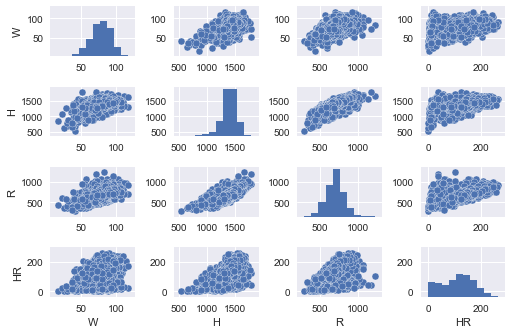

In [331]:

sns.pairplot(old_offense[['W','H','R','HR']], size = 1.2, aspect=1.5)

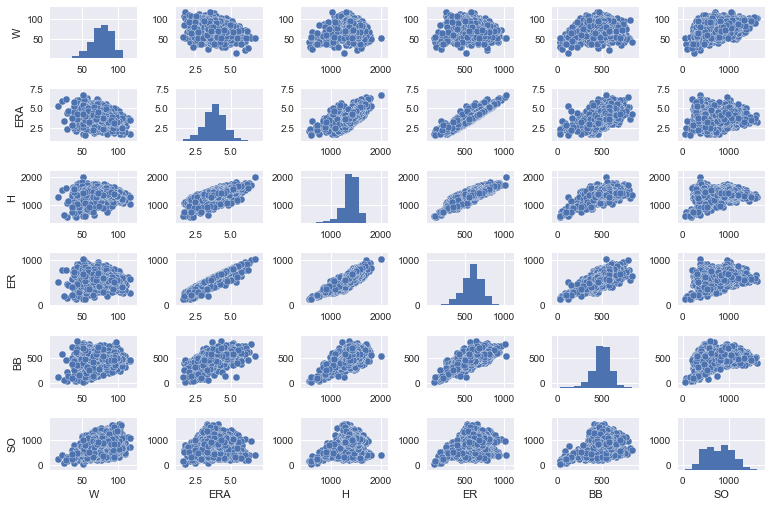

In [334]:
sns.pairplot(pitching_df[['W','ERA','H','ER','BB','SO']], size = 1.2, aspect=1.5)